In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df_dados = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df_dados

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
df_dados2012 = df_dados[df_dados["Year"] == 2012]

In [5]:
df_dados2012 = df_dados2012[df_dados2012["Income composition of resources"] > 0]
df_dados2012 = df_dados2012[df_dados2012["Schooling"] > 0]
df_dados2012 = df_dados2012[df_dados2012["infant deaths"] < 900]
df_dados2012 = df_dados2012[df_dados2012["under-five deaths "] < 900]
df_dados2012 = df_dados2012[df_dados2012["GDP"] > 0]

In [6]:
df_alcool = df_dados2012.dropna(subset=["Alcohol"])
df_BMI = df_dados2012.dropna(subset=[" BMI "])

In [7]:
def quantidade_k(df:pd.DataFrame, coluna1, coluna2):
    dists = []
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df[[coluna1, coluna2]])
        dists.append(kmeans.inertia_)
    sns.lineplot(x = range(1,10), y = dists)

# Agrupamento entre álcool e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


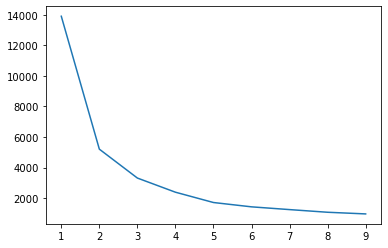

In [8]:
quantidade_k(df_alcool, "Alcohol", "Life expectancy ")

In [9]:
kmeans = KMeans(n_clusters = 5)

In [10]:
kmeans.fit(df_alcool[["Alcohol", "Life expectancy "]])

KMeans(n_clusters=5)

In [11]:
kmeans.labels_

array([1, 0, 2, 1, 0, 0, 2, 3, 3, 2, 2, 2, 0, 0, 3, 0, 1, 4, 2, 4, 0, 2,
       0, 1, 1, 2, 4, 1, 3, 1, 1, 3, 0, 2, 4, 2, 0, 2, 3, 3, 4, 0, 2, 2,
       1, 2, 4, 4, 3, 3, 4, 0, 3, 4, 3, 0, 2, 1, 1, 4, 4, 2, 0, 3, 4, 2,
       3, 3, 3, 2, 3, 2, 0, 4, 4, 2, 0, 2, 1, 4, 0, 3, 4, 1, 2, 2, 1, 3,
       4, 2, 0, 4, 2, 2, 1, 4, 4, 4, 3, 3, 2, 4, 1, 3, 2, 4, 0, 4, 0, 0,
       4, 0, 3, 2, 0, 0, 4, 2, 4, 2, 4, 0, 2, 1, 3, 3, 4, 1, 3, 2, 4, 0,
       1, 3, 3, 4, 0, 4, 1, 2, 0, 2, 2, 4, 1, 0, 2, 0, 4, 2, 1, 1])

In [12]:
df_alcool_expectativa = df_alcool
df_alcool_expectativa["classificacao"] = kmeans.labels_

C:\Users\bergs\AppData\Local\Temp/ipykernel_13684/2213264187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alcool_expectativa["classificacao"] = kmeans.labels_


<AxesSubplot:xlabel='Life expectancy ', ylabel='Alcohol'>

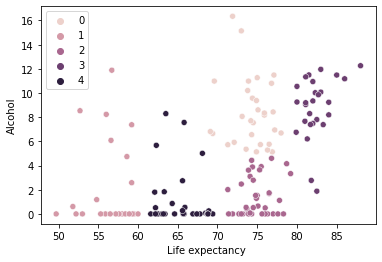

In [14]:
sns.scatterplot(data = df_alcool, x = "Life expectancy ", y = "Alcohol", hue = kmeans.labels_)

In [56]:
df_grupo0 = df_alcool_expectativa[df_alcool_expectativa["classificacao"] == 0]
df_grupo1 = df_alcool_expectativa[df_alcool_expectativa["classificacao"] == 1]
df_grupo2 = df_alcool_expectativa[df_alcool_expectativa["classificacao"] == 2]
df_grupo3 = df_alcool_expectativa[df_alcool_expectativa["classificacao"] == 3]
df_grupo4 = df_alcool_expectativa[df_alcool_expectativa["classificacao"] == 4]

In [58]:
df_grupo1[["Country"]]

,Country
3,Afghanistan
51,Angola
275,Benin
403,Burkina Faso
419,Burundi
483,Cameroon
515,Central African Republic
531,Chad
837,Equatorial Guinea
1077,Guinea


Em geral, os países do continente africano foram colocados no mesmo grupo, devido a sua baixa expectativa de vida. Mesmo os países muçulmanos, onde por motivos culturais quase não há consumo de álcool.

In [60]:
df_grupo3[["Country"]]

,Country
115,Australia
131,Austria
243,Belgium
499,Canada
547,Chile
676,Cyprus
740,Denmark
917,Finland
933,France
997,Germany


Os países com maior expectativa de vida foram todos colocados no mesmo grupo. Não há presença de países com baixíssimo consumo de álcool e, no geral, são países desenvolvidos europeus.

---------------------------------------------

# Agrupamento entre álcool e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


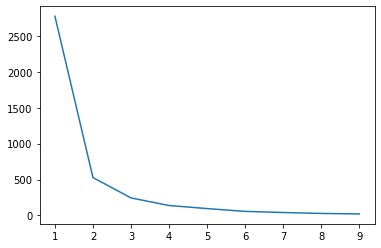

In [68]:
quantidade_k(df_alcool, "Alcohol", "Income composition of resources")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Alcohol'>

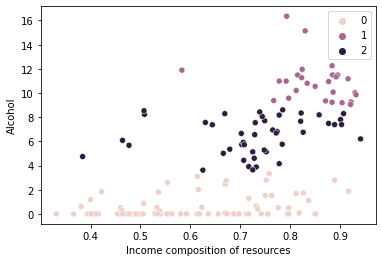

In [69]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_alcool[["Alcohol", "Income composition of resources"]])
sns.scatterplot(data = df_alcool, x = "Income composition of resources", y = "Alcohol", hue = kmeans.labels_)

In [71]:
df_alcool_IDH = df_alcool
df_alcool_IDH["classificacao"] = kmeans.labels_

C:\Users\bergs\AppData\Local\Temp/ipykernel_13684/3763776070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alcool_IDH["classificacao"] = kmeans.labels_


In [72]:
df_grupo0 = df_alcool_IDH[df_alcool_IDH["classificacao"] == 0]
df_grupo1 = df_alcool_IDH[df_alcool_IDH["classificacao"] == 1]
df_grupo2 = df_alcool_IDH[df_alcool_IDH["classificacao"] == 2]


In [76]:
df_grupo1[["Country"]]

,Country
115,Australia
131,Austria
227,Belarus
243,Belgium
387,Bulgaria
644,Croatia
676,Cyprus
740,Denmark
837,Equatorial Guinea
917,Finland


Países com um maior consumo de álcool tendem a ter um IDH maior que 0.8

----------------------------------

# Agrupamento entre expectativa de vida e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


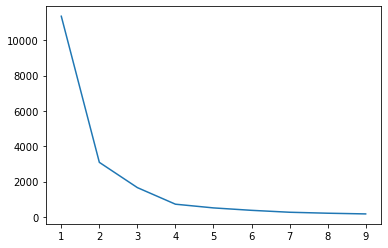

In [77]:
quantidade_k(df_dados2012, "Life expectancy ", "Income composition of resources")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

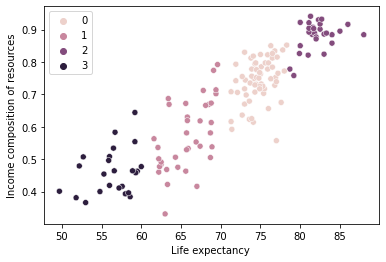

In [78]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Income composition of resources"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Income composition of resources", hue = kmeans.labels_)

In [80]:
df_exp_IDH = df_dados2012
df_exp_IDH["classificacao"] = kmeans.labels_

In [81]:
df_grupo0 = df_exp_IDH[df_exp_IDH["classificacao"] == 0]
df_grupo1 = df_exp_IDH[df_exp_IDH["classificacao"] == 1]
df_grupo2 = df_exp_IDH[df_exp_IDH["classificacao"] == 2]
df_grupo3 = df_exp_IDH[df_exp_IDH["classificacao"] == 3]

In [83]:
df_grupo2[["Country"]]

,Country
115,Australia
131,Austria
243,Belgium
499,Canada
547,Chile
628,Costa Rica
660,Cuba
676,Cyprus
740,Denmark
917,Finland


Cuba possui um IDH de 0.764, mas possui uma elevada expectativa de vida, fazendo parte do grupo de maior expectativa de vida

----------------------------

# Agrupamento entre escolaridade e expectativa de vida

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


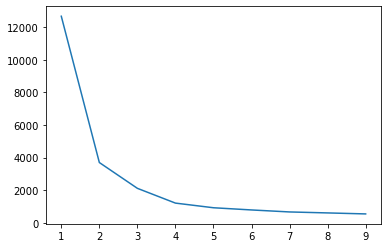

In [84]:
quantidade_k(df_dados2012, "Life expectancy ", "Schooling")

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

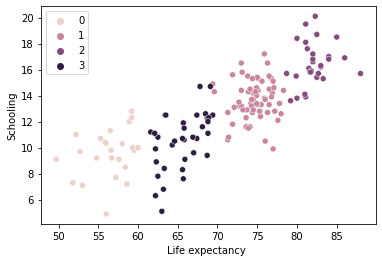

In [85]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Life expectancy ", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Life expectancy ", y = "Schooling", hue = kmeans.labels_)

In [86]:
df_exp_escolaridade = df_dados2012
df_exp_escolaridade["classificacao"] = kmeans.labels_

In [87]:
df_grupo0 = df_exp_escolaridade[df_exp_escolaridade["classificacao"] == 0]
df_grupo1 = df_exp_escolaridade[df_exp_escolaridade["classificacao"] == 1]
df_grupo2 = df_exp_escolaridade[df_exp_escolaridade["classificacao"] == 2]
df_grupo3 = df_exp_escolaridade[df_exp_escolaridade["classificacao"] == 3]

In [90]:
df_grupo3[["Country"]]

,Country
259,Belize
291,Bhutan
339,Botswana
467,Cambodia
595,Comoros
756,Djibouti
885,Ethiopia
949,Gabon
1013,Ghana
1109,Guyana


Mesmo possuindo um nível de escolaridade tão baixo quanto os africanos, países membros do grupo 3 geralmente estão localizados na ásia, por causa de uma maior expectativa de vida

---------------------------------------------------

# Agrupamento entre escolaridade e IDH

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


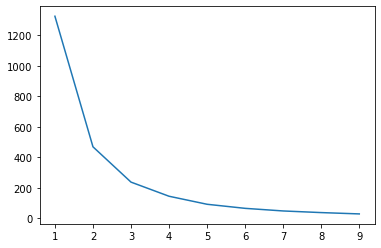

In [91]:
quantidade_k(df_dados2012, "Income composition of resources", "Schooling")

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

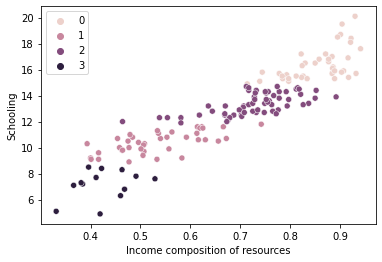

In [92]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Income composition of resources", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "Income composition of resources", y = "Schooling", hue = kmeans.labels_)

In [93]:
df_IDH_escolaridade = df_dados2012
df_IDH_escolaridade["classificacao"] = kmeans.labels_

In [94]:
df_grupo0 = df_IDH_escolaridade[df_IDH_escolaridade["classificacao"] == 0]
df_grupo1 = df_IDH_escolaridade[df_IDH_escolaridade["classificacao"] == 1]
df_grupo2 = df_IDH_escolaridade[df_IDH_escolaridade["classificacao"] == 2]
df_grupo3 = df_IDH_escolaridade[df_IDH_escolaridade["classificacao"] == 3]

In [99]:
df_grupo3[["Country"]]

,Country
403,Burkina Faso
515,Central African Republic
531,Chad
756,Djibouti
885,Ethiopia
1077,Guinea
1621,Mali
1654,Mauritania
1880,Niger
1945,Pakistan


------------------------------

# Agrupamento entre escolaridade e gastos pessoais com saúde

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


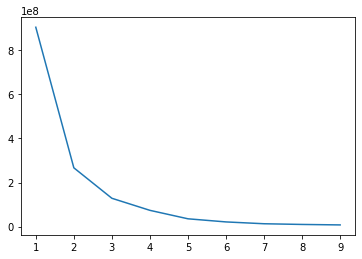

In [100]:
quantidade_k(df_dados2012, "percentage expenditure", "Schooling")

<AxesSubplot:xlabel='percentage expenditure', ylabel='Schooling'>

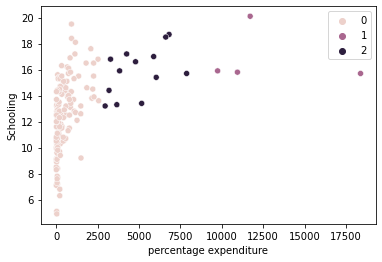

In [101]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_dados2012[["percentage expenditure", "Schooling"]])
sns.scatterplot(data = df_dados2012, x = "percentage expenditure", y = "Schooling", hue = kmeans.labels_)

In [102]:
df_PE_escolaridade = df_dados2012
df_PE_escolaridade["classificacao"] = kmeans.labels_

In [112]:
df_grupo0 = df_PE_escolaridade[df_PE_escolaridade["classificacao"] == 0]
df_grupo1 = df_PE_escolaridade[df_PE_escolaridade["classificacao"] == 1]
df_grupo2 = df_PE_escolaridade[df_PE_escolaridade["classificacao"] == 2]

In [113]:
df_grupo1[["Country"]]

,Country
115,Australia
499,Canada
2508,Sweden
2524,Switzerland


----------------------------------------------

# Agrupamento entre escolaridade e consumo de álcool

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


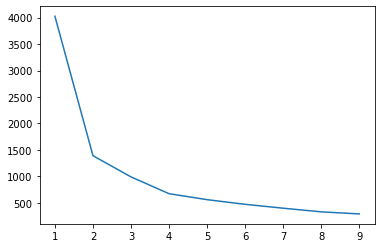

In [114]:
quantidade_k(df_alcool, "Schooling", "Alcohol")

<AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>

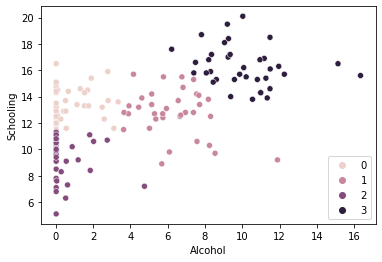

In [115]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_alcool[["Schooling", "Alcohol"]])
sns.scatterplot(data = df_alcool, x = "Alcohol", y = "Schooling", hue = kmeans.labels_)

In [116]:
df_alcool_escolaridade = df_alcool
df_alcool_escolaridade["classificacao"] = kmeans.labels_

C:\Users\bergs\AppData\Local\Temp/ipykernel_13684/2800363115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alcool_escolaridade["classificacao"] = kmeans.labels_


In [117]:
df_grupo0 = df_alcool_escolaridade[df_alcool_escolaridade["classificacao"] == 0]
df_grupo1 = df_alcool_escolaridade[df_alcool_escolaridade["classificacao"] == 1]
df_grupo2 = df_alcool_escolaridade[df_alcool_escolaridade["classificacao"] == 2]
df_grupo3 = df_alcool_escolaridade[df_alcool_escolaridade["classificacao"] == 3]

In [122]:
df_grupo0[["Country"]]

,Country
35,Algeria
147,Azerbaijan
179,Bahrain
291,Bhutan
339,Botswana
371,Brunei Darussalam
451,Cabo Verde
628,Costa Rica
821,El Salvador
869,Estonia


------------------------

# Agrupamento entre massa corporal e mortalidade infantil

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


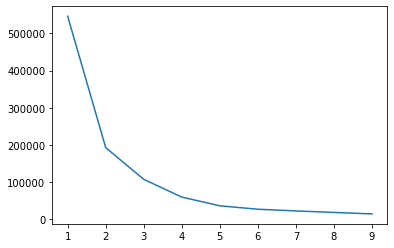

In [123]:
quantidade_k(df_BMI, " BMI ", "infant deaths")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

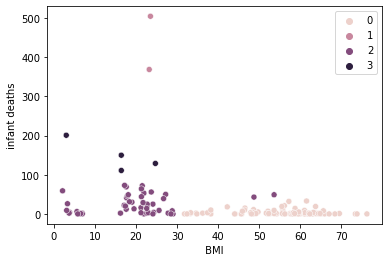

In [124]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_BMI[[" BMI ", "infant deaths"]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "infant deaths", hue = kmeans.labels_)

In [125]:
df_BMI_mortalidadeI = df_BMI
df_BMI_mortalidadeI["classificacao"] = kmeans.labels_

C:\Users\bergs\AppData\Local\Temp/ipykernel_13684/4041197878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMI_mortalidadeI["classificacao"] = kmeans.labels_


In [126]:
df_grupo0 = df_BMI_mortalidadeI[df_BMI_mortalidadeI["classificacao"] == 0]
df_grupo1 = df_BMI_mortalidadeI[df_BMI_mortalidadeI["classificacao"] == 1]
df_grupo2 = df_BMI_mortalidadeI[df_BMI_mortalidadeI["classificacao"] == 2]
df_grupo3 = df_BMI_mortalidadeI[df_BMI_mortalidadeI["classificacao"] == 3]

In [130]:
df_grupo3[["Country"]]

,Country
195,Bangladesh
563,China
885,Ethiopia
1205,Indonesia


In [132]:
df_grupo1[["Country"]]

,Country
1896,Nigeria
1945,Pakistan


Os dados da Índia estavam incorretos, apresentando um número de mortalidade infantil muito elevado. Países muito populosos da Ásia se destacam nesse quesito

----------------------------

# Agrupamento entre massa corporal e mortalidade abaixo de 5 anos

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


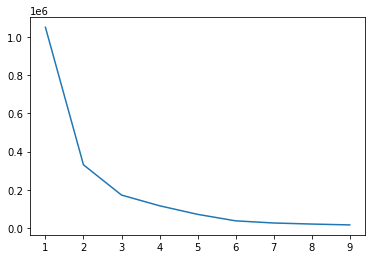

In [133]:
quantidade_k(df_BMI, " BMI ", "under-five deaths ")

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

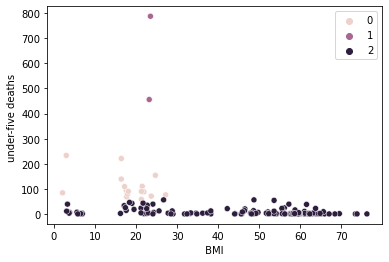

In [134]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_BMI[[" BMI ", "under-five deaths "]])
sns.scatterplot(data = df_BMI, x = " BMI ", y = "under-five deaths ", hue = kmeans.labels_)

In [135]:
df_BMI_mortalidade5 = df_BMI
df_BMI_mortalidade5["classificacao"] = kmeans.labels_

C:\Users\bergs\AppData\Local\Temp/ipykernel_13684/2598381746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMI_mortalidade5["classificacao"] = kmeans.labels_


In [136]:
df_grupo0 = df_BMI_mortalidade5[df_BMI_mortalidade5["classificacao"] == 0]
df_grupo1 = df_BMI_mortalidade5[df_BMI_mortalidade5["classificacao"] == 1]
df_grupo2 = df_BMI_mortalidade5[df_BMI_mortalidade5["classificacao"] == 2]

In [139]:
df_grupo1[["Country"]]

,Country
1896,Nigeria
1945,Pakistan


----------------------------

# Agrupamento entre gastos governamentais e PIB per capita

C:\Users\bergs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


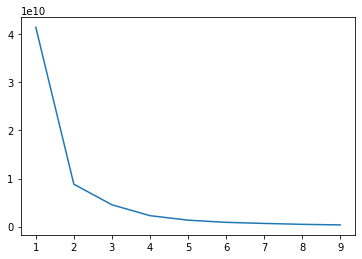

In [140]:
quantidade_k(df_dados2012, "Total expenditure", "GDP")

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

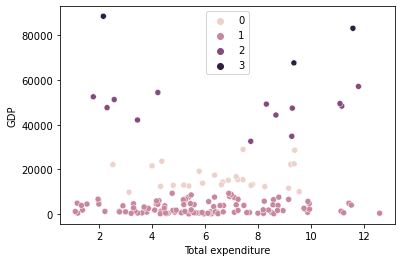

In [141]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_dados2012[["Total expenditure", "GDP"]])
sns.scatterplot(data = df_dados2012, x = "Total expenditure", y = "GDP", hue = kmeans.labels_)

In [142]:
df_gastos_PIBperc = df_dados2012
df_gastos_PIBperc["classificacao"] = kmeans.labels_

In [143]:
df_grupo0 = df_gastos_PIBperc[df_gastos_PIBperc["classificacao"] == 0]
df_grupo1 = df_gastos_PIBperc[df_gastos_PIBperc["classificacao"] == 1]
df_grupo2 = df_gastos_PIBperc[df_gastos_PIBperc["classificacao"] == 2]
df_grupo3 = df_gastos_PIBperc[df_gastos_PIBperc["classificacao"] == 3]

In [146]:
df_grupo3[["Country"]]

,Country
115,Australia
2074,Qatar
2524,Switzerland


O PIB per capita de um país não influencia nos gastos governamentais com saúde